In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Rocker\Downloads/ifood_df.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())
print(df.info())


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# If there are missing values, handle them (e.g., fill with mean/median or drop rows)
# Example: df.fillna(df.mean(), inplace=True)


Series([], dtype: int64)


In [3]:
# Calculate total spending per customer
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate purchase frequency
df['Purchase_Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calculate average purchase value
df['Avg_Purchase_Value'] = df.apply(
    lambda row: row['Total_Spending'] / row['Purchase_Frequency'] if row['Purchase_Frequency'] > 0 else 0,
    axis=1
)

# Descriptive statistics for key metrics
descriptive_stats = df[['Total_Spending', 'Purchase_Frequency', 'Avg_Purchase_Value', 'Recency']].describe()
print(descriptive_stats)


       Total_Spending  Purchase_Frequency  Avg_Purchase_Value      Recency
count     2205.000000         2205.000000         2205.000000  2205.000000
mean       606.821769           14.887982           32.590924    49.009070
std        601.675284            7.615277           28.556446    28.932111
min          5.000000            0.000000            0.000000     0.000000
25%         69.000000            8.000000            9.714286    24.000000
50%        397.000000           15.000000           23.375000    49.000000
75%       1047.000000           21.000000           45.346154    74.000000
max       2525.000000           43.000000          186.500000    99.000000


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['Total_Spending', 'Purchase_Frequency', 'Avg_Purchase_Value', 'Recency']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

# Analyze the characteristics of each segment
segment_analysis = df.groupby('Segment').mean()
print(segment_analysis)


C:\Users\Rocker\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Segment                                                                       
0        36727.356618  0.740809  0.520221  75.323529   58.683824   6.408088   
1        66167.961259  0.111380  0.581114  75.251816  528.176755  41.966102   
2        34589.095413  0.748624  0.456881  25.007339   42.132110   5.038532   
3        60732.714640  0.265509  0.727047  25.265509  392.565757  33.243176   
4        77311.093333  0.036667  0.173333  40.663333  812.886667  70.860000   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Segment                                                                     
0              30.156250         8.939338          6.777574     17.946691   
1             270.907990        63.399516         48.615012     71.583535   
2              21.205505         7.616514          4.812844     15.088073   
3             170.481390        45.548387         31.295285  

C:\Users\Rocker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rocker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rocker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rocker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

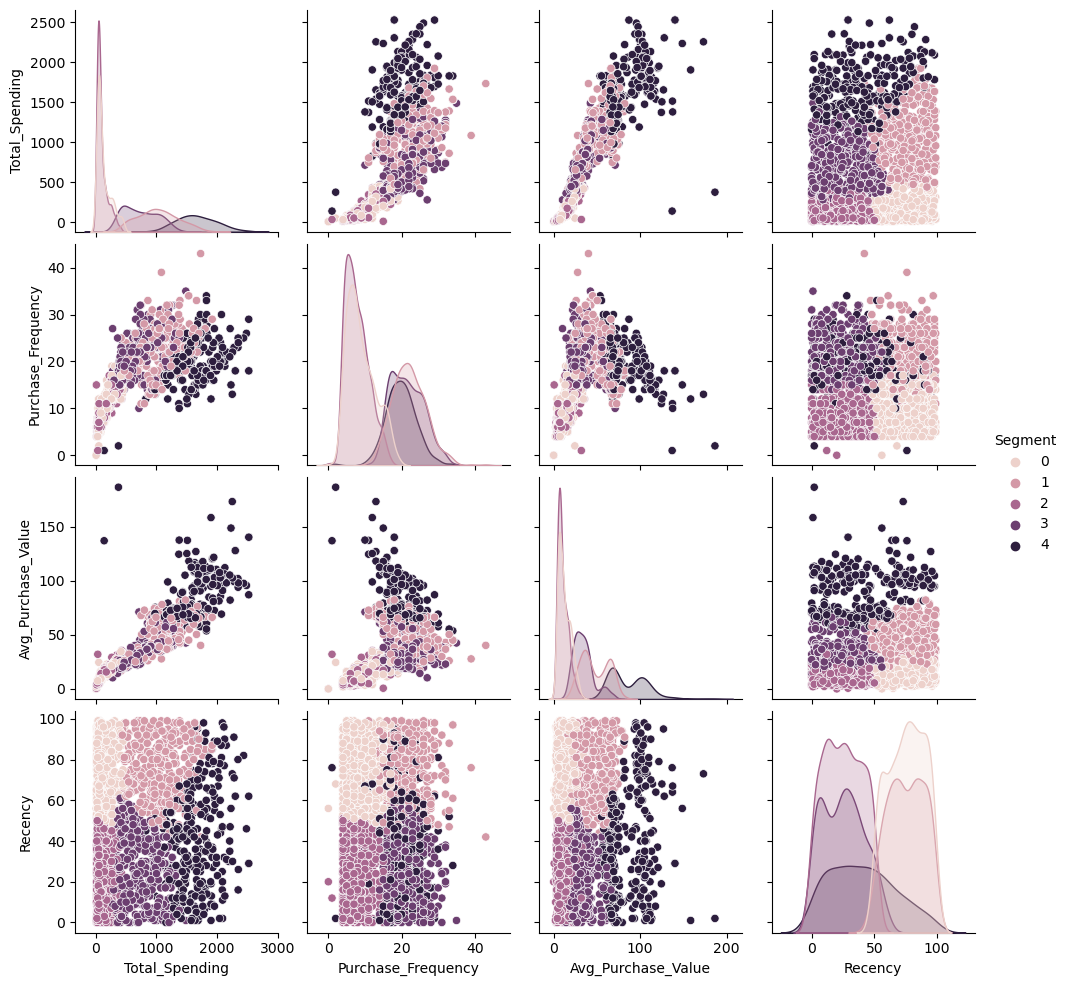

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize segments
sns.pairplot(df, hue='Segment', vars=['Total_Spending', 'Purchase_Frequency', 'Avg_Purchase_Value', 'Recency'])
plt.show()


In [ ]:
# Insights and Recommendations
# Analyze the characteristics of each segment to provide insights and recommendations. Look at the average spending, frequency of purchases, and recency to understand customer behavior and inform targeted marketing strategies.